In [2]:
import plumed
import matplotlib.pyplot as plt
import os
import MDAnalysis
import numpy as np
import math

In [2]:
os.chdir("/media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/metad")
!pwd
os.getcwd()

/media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/metad


'/media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/metad'

In [3]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
phi: TORSION ATOMS=3647,3649,3651,3667
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
psi: TORSION ATOMS=3649,3651,3667,3669
# Print the two collective variables on COLVAR file every step
PRINT ARG=phi,psi FILE=up-rama STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc up/v+center100nsup.xtc 


DRIVER: Found molfile format trajectory xtc with name up/v+center100nsup.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 185508
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action TORSION
PLUMED:   with label phi
PLUMED:   between atoms 3647 3649 3651 3667
PLUMED:   using periodic boundary conditions
PLUMED: Action TORSION
PLUMED:   with label psi
PLUMED:   between atoms 3649 3651 3667 3669
PLUMED:   using periodic boundary conditions
PLUMED: Action PRINT
PLUMED:   with label @2
PLUMED:   w

In [4]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
phi: TORSION ATOMS=3647,3649,3651,3667
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
psi: TORSION ATOMS=3649,3651,3667,3669
# Print the two collective variables on COLVAR file every step
PRINT ARG=phi,psi FILE=down-rama STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc down/v+center100nsdown.xtc 


DRIVER: Found molfile format trajectory xtc with name down/v+center100nsdown.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 244908
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action TORSION
PLUMED:   with label phi
PLUMED:   between atoms 3647 3649 3651 3667
PLUMED:   using periodic boundary conditions
PLUMED: Action TORSION
PLUMED:   with label psi
PLUMED:   between atoms 3649 3651 3667 3669
PLUMED:   using periodic boundary conditions
PLUMED: Action PRINT
PLUMED:   with label @2
PLUMED:

Std phi run_A: 0.1962072449841156
Std phi run_B: 0.44420899170914646
Std psi run_A: 0.21094420674774708
Std psi run_B: 1.5834418495535274


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


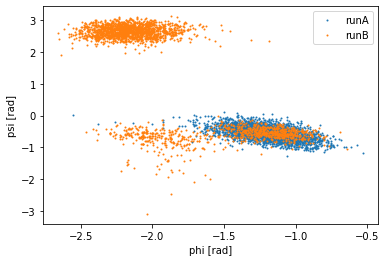

In [5]:
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas("up-rama")
dataB=plumed.read_as_pandas("down-rama")
# plot phi vs psi
plt.plot(dataA["phi"],dataA["psi"],'o',ms=1, label="runA")
plt.plot(dataB["phi"],dataB["psi"],'o',ms=1, label="runB")
# x-y axis labels
plt.xlabel("phi [rad]")
plt.ylabel("psi [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std phi run_A:",np.std(dataA["phi"]))
print("Std phi run_B:",np.std(dataB["phi"]))
print("Std psi run_A:",np.std(dataA["psi"]))
print("Std psi run_B:",np.std(dataB["psi"]))

In [6]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
c1: CENTER ATOMS=4186-4538
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
c2: CENTER ATOMS=6886-7042
d1: DISTANCE ATOMS=c1,c2
# Print the two collective variables on COLVAR file every step
PRINT ARG=d1 FILE=up-dist STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc up/v+center100nsup.xtc 


DRIVER: Found molfile format trajectory xtc with name up/v+center100nsup.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 185508
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label c1
PLUMED:   serial associated to this virtual atom is 185509
PLUMED:   of atoms:
PLUMED:  4186 4187 4188 4189 4190 4191 4192 4193 4194 4195 4196 4197 4198 4199 4200 4201 4202 4203 4204 4205 4206 4207 4208 4209 4210
PLUMED:  4211 4212 4213 4214 4215 4216 4217 4218 4219 4220 4221 4222 42

In [7]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
c1: CENTER ATOMS=4186-4538
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
c2: CENTER ATOMS=6886-7042
d1: DISTANCE ATOMS=c1,c2
# Print the two collective variables on COLVAR file every step
PRINT ARG=d1 FILE=down-dist STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc down/v+center100nsdown.xtc 


DRIVER: Found molfile format trajectory xtc with name down/v+center100nsdown.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 244908
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label c1
PLUMED:   serial associated to this virtual atom is 244909
PLUMED:   of atoms:
PLUMED:  4186 4187 4188 4189 4190 4191 4192 4193 4194 4195 4196 4197 4198 4199 4200 4201 4202 4203 4204 4205 4206 4207 4208 4209 4210
PLUMED:  4211 4212 4213 4214 4215 4216 4217 4218 4219 4220 4221 422

Std dist run_A: 0.032154771883626476
Std dist run_B: 0.08438937163564028


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


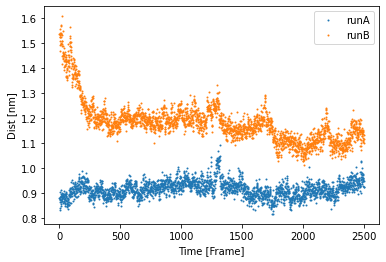

In [20]:
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas("up-dist")
dataB=plumed.read_as_pandas("down-dist")
# plot phi vs psi
plt.plot(dataA["time"],dataA["d1"],'o',ms=1, label="runA")
plt.plot(dataB["time"],dataB["d1"],'o',ms=1, label="runB")
# x-y axis labels
plt.xlabel("Time [Frame]")
plt.ylabel("Dist [nm]")
plt.legend()
# calculate Gaussian sigma
print("Std dist run_A:",np.std(dataA["d1"]))
print("Std dist run_B:",np.std(dataB["d1"]))

In [15]:
%%bash
# Exercise 2
# create directory for this exercise
mkdir Exercise-2; cd Exercise-2
# create PLUMED input file
cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE=../data/diala/dialaA.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C
# you should use MOLINFO shortcuts
phi: TORSION ATOMS=3647,3649,3651,3667
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
psi: TORSION ATOMS=3649,3651,3667,3669
# Activate well-tempered metadynamics in phi
metad: METAD ARG=psi ...
   # Deposit a Gaussian every 500 time steps (every 1picosec), with initial height 
   # equal to 1.2 kJ/mol and bias factor equal to 8 (8 times of the temperature bias wt-metad) 
   PACE=500 HEIGHT=1.2 BIASFACTOR=8 
   # Gaussian width (sigma) should be chosen based on the CV fluctuations in unbiased run (in between psi std 0.2 and 1.6)
   SIGMA=0.7 
   # Gaussians will be written to file and also stored on grid 
   FILE=HILLS GRID_MIN=-pi GRID_MAX=pi 
...
# Print both collective variables on COLVAR file every 10 steps
PRINT ARG=phi,psi FILE=COLVAR STRIDE=10   
EOF

# run simulation
gmx mdrun -s /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/metad/phospho/topol.tpr -plumed plumed.dat

mkdir: cannot create directory ‘Exercise-2’: File exists
                      :-) GROMACS - gmx mdrun, 2022.2 (-:

Executable:   /usr/local/gromacs2022/bin/gmx
Data prefix:  /usr/local/gromacs2022
Working dir:  /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/metad/Exercise-2
Command line:
  gmx mdrun -s /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/metad/phospho/topol.tpr -plumed plumed.dat


-------------------------------------------------------
Program:     gmx mdrun, version 2022.2
Source file: src/gromacs/commandline/cmdlineparser.cpp (line 271)
Function:    void gmx::CommandLineParser::parse(int*, char**)

Error in user input:
Invalid command-line options
    Unknown command-line option -plumed

For more information and tips for troubleshooting, please check the GROMACS
website at

CalledProcessError: Command 'b'# Exercise 2\n# create directory for this exercise\nmkdir Exercise-2; cd Exercise-2\n# create PLUMED input file\ncat > "plumed.dat" << EOF\n# Activate MOLINFO functionalities\n#MOLINFO STRUCTURE=../data/diala/dialaA.pdb \n# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C\n# you should use MOLINFO shortcuts\nphi: TORSION ATOMS=3647,3649,3651,3667\n# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)\n# here also you should to use MOLINFO shortcuts\npsi: TORSION ATOMS=3649,3651,3667,3669\n# Activate well-tempered metadynamics in phi\nmetad: METAD ARG=psi ...\n   # Deposit a Gaussian every 500 time steps (every 1picosec), with initial height \n   # equal to 1.2 kJ/mol and bias factor equal to 8 (8 times of the temperature bias wt-metad) \n   PACE=500 HEIGHT=1.2 BIASFACTOR=8 \n   # Gaussian width (sigma) should be chosen based on the CV fluctuations in unbiased run (in between psi std 0.2 and 1.6)\n   SIGMA=0.7 \n   # Gaussians will be written to file and also stored on grid \n   FILE=HILLS GRID_MIN=-pi GRID_MAX=pi \n...\n# Print both collective variables on COLVAR file every 10 steps\nPRINT ARG=phi,psi FILE=COLVAR STRIDE=10   \nEOF\n\n# run simulation\ngmx mdrun -s /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/metad/phospho/topol.tpr -plumed plumed.dat\n'' returned non-zero exit status 1.

In [18]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
c1: CENTER ATOMS=3429,3452,3473,3493,3513,3533,3553,3569 #COM of P2(I207-L214) residues only Ca
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
c2: CENTER ATOMS=4188 #Ca of Y250
c3: CENTER ATOMS=4186-4538 #COM Of Y250-K268
d1: ANGLE ATOMS=c1,c2,c3
# Print the two collective variables on COLVAR file every step
PRINT ARG=d1 FILE=up-angle STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc up/v+center100nsup.xtc 


DRIVER: Found molfile format trajectory xtc with name up/v+center100nsup.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 185508
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label c1
PLUMED:   serial associated to this virtual atom is 185509
PLUMED:   of atoms:
PLUMED:  3429 3452 3473 3493 3513 3533 3553 3569
PLUMED:  using the geometric center
PLUMED:   broken molecules will be rebuilt assuming atoms are in the proper order
PLUMED: Action CENTER
PLUMED:   with l

In [19]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
c1: CENTER ATOMS=3429,3452,3473,3493,3513,3533,3553,3569 #COM of P2(I207-L214) residues only Ca
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
c2: CENTER ATOMS=4188 #Ca of Y250
c3: CENTER ATOMS=4186-4538 #COM Of Y250-K268
d1: ANGLE ATOMS=c1,c2,c3
# Print the two collective variables on COLVAR file every step
PRINT ARG=d1 FILE=down-angle STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc down/v+center100nsdown.xtc 


DRIVER: Found molfile format trajectory xtc with name down/v+center100nsdown.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 244908
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label c1
PLUMED:   serial associated to this virtual atom is 244909
PLUMED:   of atoms:
PLUMED:  3429 3452 3473 3493 3513 3533 3553 3569
PLUMED:  using the geometric center
PLUMED:   broken molecules will be rebuilt assuming atoms are in the proper order
PLUMED: Action CENTER
PLUMED:   wi

Std dist run_A: 0.03730832648706689
Std dist run_B: 0.06669088478034436


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


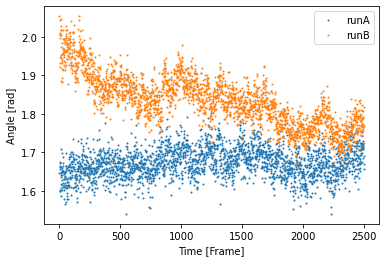

In [21]:
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas("up-angle")
dataB=plumed.read_as_pandas("down-angle")
# plot phi vs psi
plt.plot(dataA["time"],dataA["d1"],'o',ms=1, label="runA")
plt.plot(dataB["time"],dataB["d1"],'o',ms=1, label="runB")
# x-y axis labels
plt.xlabel("Time [Frame]")
plt.ylabel("Angle [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std dist run_A:",np.std(dataA["d1"]))
print("Std dist run_B:",np.std(dataB["d1"]))

In [22]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
c1: CENTER ATOMS=3429,3452,3473,3493,3513,3533,3553,3569 #COM of P2(I207-L214) residues only Ca
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
c2: CENTER ATOMS=4188 #Ca of Y250
c3: CENTER ATOMS=4186-4538 #COM Of Y250-K268
d1: ANGLE ATOMS=c1,c2,c3
# Print the two collective variables on COLVAR file every step
PRINT ARG=d1 FILE=upup-angle STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/3micro/4/v+center.xtc 


DRIVER: Found molfile format trajectory xtc with name /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/3micro/4/v+center.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 245250
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label c1
PLUMED:   serial associated to this virtual atom is 245251
PLUMED:   of atoms:
PLUMED:  3429 3452 3473 3493 3513 3533 3553 3569
PLUMED:  

Std dist run_A: 0.03730832648706689
Std dist run_B: 0.05062586136662255


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


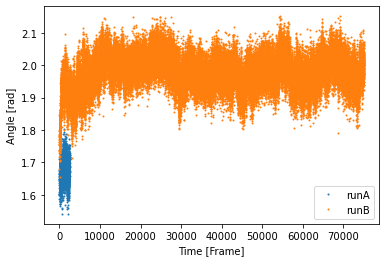

In [23]:
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas("up-angle")
dataB=plumed.read_as_pandas("phospho-angle")
# plot phi vs psi
plt.plot(dataA["time"],dataA["d1"],'o',ms=1, label="runA")
plt.plot(dataB["time"],dataB["d1"],'o',ms=1, label="runB")
# x-y axis labels
plt.xlabel("Time [Frame]")
plt.ylabel("Angle [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std dist run_A:",np.std(dataA["d1"]))
print("Std dist run_B:",np.std(dataB["d1"]))

In [24]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
c1: CENTER ATOMS=3429,3452,3473,3493,3513,3533,3553,3569 #COM of P2(I207-L214) residues only Ca
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
c2: CENTER ATOMS=4188 #Ca of Y250
c3: CENTER ATOMS=4186-4538 #COM Of Y250-K268
d1: ANGLE ATOMS=c1,c2,c3
# Print the two collective variables on COLVAR file every step
PRINT ARG=d1 FILE=initialdown-angle STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2down/noreseq/hlrndone/1/trjcenter.xtc


DRIVER: Found molfile format trajectory xtc with name /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2down/noreseq/hlrndone/1/trjcenter.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 122454
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label c1
PLUMED:   serial associated to this virtual atom is 122455
PLUMED:   of atoms:
PLUMED:  3429 3452 3473 3493 3513 3533 3553 3569
PLUMED:  using the geome

In [26]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
c1: CENTER ATOMS=3429,3452,3473,3493,3513,3533,3553,3569 #COM of P2(I207-L214) residues only Ca
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
c2: CENTER ATOMS=4188 #Ca of Y250
c3: CENTER ATOMS=4186-4538 #COM Of Y250-K268
d1: ANGLE ATOMS=c1,c2,c3
# Print the two collective variables on COLVAR file every step
PRINT ARG=d1 FILE=initialup-angle STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/noreseq/hlrndone/2/trjcenter.xtc


DRIVER: Found molfile format trajectory xtc with name /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/noreseq/hlrndone/2/trjcenter.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 92754
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label c1
PLUMED:   serial associated to this virtual atom is 92755
PLUMED:   of atoms:
PLUMED:  3429 3452 3473 3493 3513 3533 3553 3569
PLUMED:  using the geometric

Std dist run_A: 0.03971756622893848
Std dist run_B: 0.05287836188116549


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


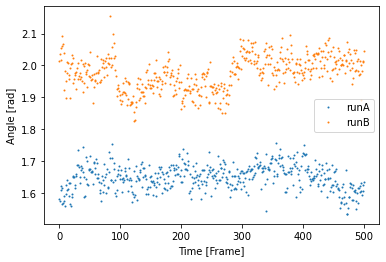

In [27]:
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas("initialup-angle")
dataB=plumed.read_as_pandas("initialdown-angle")
# plot phi vs psi
plt.plot(dataA["time"],dataA["d1"],'o',ms=1, label="runA")
plt.plot(dataB["time"],dataB["d1"],'o',ms=1, label="runB")
# x-y axis labels
plt.xlabel("Time [Frame]")
plt.ylabel("Angle [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std dist run_A:",np.std(dataA["d1"]))
print("Std dist run_B:",np.std(dataB["d1"]))

In [29]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
phi: TORSION ATOMS=3647,3649,3651,3667
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
psi: TORSION ATOMS=3649,3651,3667,3669
# Print the two collective variables on COLVAR file every step
PRINT ARG=phi,psi FILE=phospholast100-rama STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc phospholast100ns/v+centerlast100ns.xtc 


DRIVER: Found molfile format trajectory xtc with name phospholast100ns/v+centerlast100ns.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 245250
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action TORSION
PLUMED:   with label phi
PLUMED:   between atoms 3647 3649 3651 3667
PLUMED:   using periodic boundary conditions
PLUMED: Action TORSION
PLUMED:   with label psi
PLUMED:   between atoms 3649 3651 3667 3669
PLUMED:   using periodic boundary conditions
PLUMED: Action PRINT
PLUMED:   with labe

/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


Std phi run_A: 0.1962072449841156
Std phi run_B: 0.1661338507417364
Std psi run_A: 0.21094420674774708
Std psi run_B: 0.308855338415935


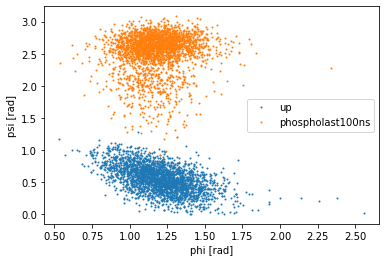

In [21]:
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas("up-rama")
dataB=plumed.read_as_pandas("phospholast100-rama")
# plot phi vs psi
plt.plot(abs(dataA["phi"]),abs(dataA["psi"]),'o',ms=1, label="up")
plt.plot(abs(dataB["phi"]),abs(dataB["psi"]),'o',ms=1, label="phospholast100ns")
# x-y axis labels
plt.xlabel("phi [rad]")
plt.ylabel("psi [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std phi run_A:",np.std(dataA["phi"]))
print("Std phi run_B:",np.std(dataB["phi"]))
print("Std psi run_A:",np.std(dataA["psi"]))
print("Std psi run_B:",np.std(dataB["psi"]))

plt.savefig("rama_up4_phospholast100rep43micro_noabs_plot.pdf", format='pdf')

In [31]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
c1: CENTER ATOMS=3429,3452,3473,3493,3513,3533,3553,3569 #COM of P2(I207-L214) residues only Ca
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
c2: CENTER ATOMS=4188 #Ca of Y250
c3: CENTER ATOMS=4186-4538 #COM Of Y250-K268
d1: ANGLE ATOMS=c1,c2,c3
# Print the two collective variables on COLVAR file every step
PRINT ARG=d1 FILE=phospholast100-angle STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc phospholast100ns/v+centerlast100ns.xtc


DRIVER: Found molfile format trajectory xtc with name phospholast100ns/v+centerlast100ns.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 245250
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label c1
PLUMED:   serial associated to this virtual atom is 245251
PLUMED:   of atoms:
PLUMED:  3429 3452 3473 3493 3513 3533 3553 3569
PLUMED:  using the geometric center
PLUMED:   broken molecules will be rebuilt assuming atoms are in the proper order
PLUMED: Action CENTER


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


Std dist run_A: 0.03730832648706689
Std dist run_B: 0.044623565171504884


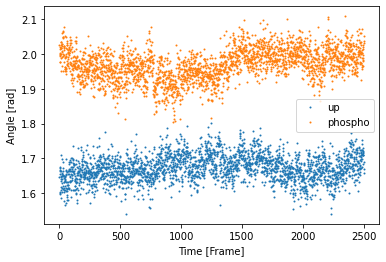

In [5]:
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas("up-angle")
dataB=plumed.read_as_pandas("phospholast100-angle")
# plot phi vs psi
plt.plot(dataA["time"],dataA["d1"],'o',ms=1, label="up")
plt.plot(dataB["time"],dataB["d1"],'o',ms=1, label="phospho")
# x-y axis labels
plt.xlabel("Time [Frame]")
plt.ylabel("Angle [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std dist run_A:",np.std(dataA["d1"]))
print("Std dist run_B:",np.std(dataB["d1"]))

plt.savefig("cterm_angle_uprep4_phospholast100rep43micro.pdf", format='pdf')

/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


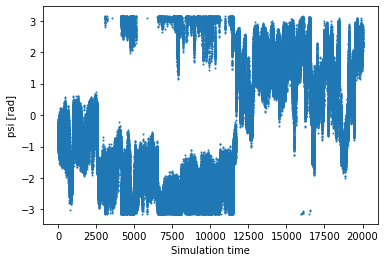

In [7]:
# visualize CV file
data=plumed.read_as_pandas("phospho/COLVAR")
# plot phi during simulation (first 200k points)
plt.plot(data["time"][:500000],data["psi"][:500000],'o', ms=1)
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("psi [rad]")

plt.savefig("metad_phospho_dihedral20ns.pdf", format='pdf')

/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


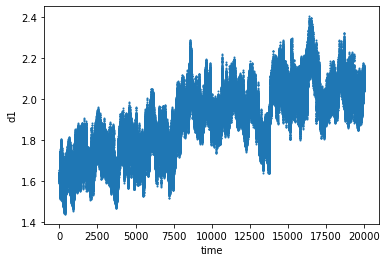

In [27]:
# visualize CV file
data=plumed.read_as_pandas("phospho/COLVAR")
# plot phi during simulation (first 200k points)
plt.plot(data["time"][:500000],data["d1"][:500000],'o', ms=1)
# x-y axis labels
plt.xlabel("time")
plt.ylabel("d1")

plt.savefig("metad_phospho_ctermangle20ns.pdf", format='pdf')

/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  after removing the cwd from sys.path.
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  import sys


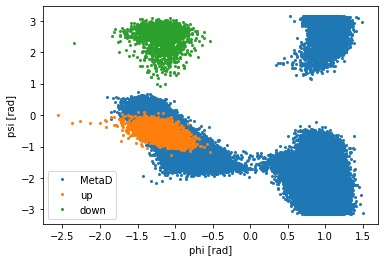

In [17]:
# plot phi vs psi
# plot phi vs psi

data=plumed.read_as_pandas("phospho/COLVAR")

dataD=plumed.read_as_pandas("up-rama")
dataE=plumed.read_as_pandas("phospholast100-rama")


data["phi"] = (data["phi"])
data["psi"] = (data["psi"])


#dataD["phi"] = abs(dataD["phi"])
#dataD["psi"] = abs(dataD["psi"])

#dataE["phi"] = abs(dataE["phi"])
#dataE["psi"] = abs(dataE["psi"])

plt.plot(data["phi"][:275000],data["psi"][:275000],'o', ms=2,   label="MetaD")
plt.plot(dataD["phi"][:],dataD["psi"][:],'o', ms=2, label="up")
plt.plot(dataE["phi"][:],dataE["psi"][:],'o', ms=2, label="down")

# x-y axis labels
plt.xlabel("phi [rad]")
plt.ylabel("psi [rad]")
plt.legend()

plt.savefig("rama_all_noabs_plot_100ns.pdf", format='pdf')

/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: cannot load PLUMED instance, conversions will not be available
  if __name__ == '__main__':


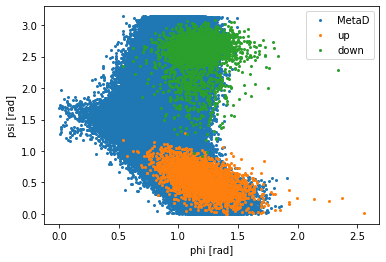

In [25]:
# plot phi vs psi
# plot phi vs psi





dataD=plumed.read_as_pandas("up-rama")
dataE=plumed.read_as_pandas("phospholast100-rama")


data["phi_abs"] = abs(data["phi"])
data["psi_abs"] = abs(data["psi"])


dataD["phi_abs"] = abs(dataD["phi"])
dataD["psi_abs"] = abs(dataD["psi"])

dataE["phi_abs"] = abs(dataE["phi"])
dataE["psi_abs"] = abs(dataE["psi"])

plt.plot(data["phi_abs"][:275000],data["psi_abs"][:275000],'o', ms=2,   label="MetaD")
plt.plot(dataD["phi_abs"][:],dataD["psi_abs"][:],'o', ms=2, label="up")
plt.plot(dataE["phi_abs"][:],dataE["psi_abs"][:],'o', ms=2, label="down")

# x-y axis labels
plt.xlabel("phi [rad]")
plt.ylabel("psi [rad]")
plt.legend()

plt.savefig("rama_all_plot_11ns.pdf", format='pdf')


In [156]:
%%bash
# compute free energy as a function of simulation time
cd phospho
plumed sum_hills --hills HILLS --stride 200 --mintozero

PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: Finished setup
PLUMED: Action FAKE
PLUMED:   with label psi
PLUMED: A

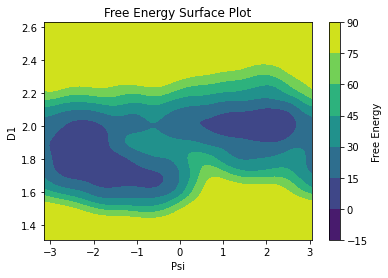

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load data from "fes_50.dat"
data = np.loadtxt("phospho/fes_100.dat")

#dataD["phi"] = abs(dataD["phi"])
# Extract columns for X, Y, and Z axes
psi = data[:, 0]
d1 =  data[:, 1]
free_energy = data[:, 2]

# Create a grid for plotting
grid_psi, grid_d1 = np.meshgrid(np.linspace(min(psi), max(psi), 100), np.linspace(min(d1), max(d1), 100))

# Interpolate the free energy values on the grid
grid_free_energy = griddata((psi, d1), free_energy, (grid_psi, grid_d1), method='cubic')

# Create a 1D free energy surface plot with a color contour
plt.figure()
contour = plt.contourf(grid_psi, grid_d1, grid_free_energy, cmap='viridis')
plt.colorbar(contour, label='Free Energy')

# Add labels
plt.xlabel('Psi')
plt.ylabel('D1')
plt.title('Free Energy Surface Plot')

# Show the plot
#plt.savefig("surface_fe_100ns.pdf", format='pdf')
plt.show()

/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  


Text(0, 0.5, 'DeltaF [kJ/mol]')

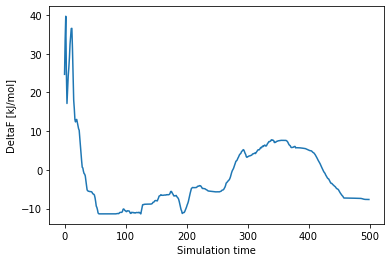

In [30]:
# calculate free-energy difference
DeltaF=[]; kbt=2.494339
# cycle on free-energy profiles
for i in range(0,500):   
 # import fes file into pandas dataset
 data=plumed.read_as_pandas("phospho/fes_"+str(i)+".dat")
 # find minimum value of fes
 minf = min(abs(data["file.free"]))
 # plot fes
 F0=0.0; F1=0.0
 for j in range(0, len(data["psi"])):
     psi = data["psi"][j]
     # calculate probability
     p = math.exp((-data["file.free"][j]+minf)/kbt)
     # integrate in the two basins
     if((-3<=psi<=-2 or 2<=psi<=3 ):F0 += p
     if(-1<=psi<=1): F1 += p
 # calculate free energy difference and add to list
 DeltaF.append(-kbt*math.log(F0/F1))         
# plot
plt.savefig("DeltaF_psi.pdf", format='pdf')
plt.plot(DeltaF) 
# labels
plt.xlabel("Simulation time")
plt.ylabel("DeltaF [kJ/mol]")


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  


Text(0, 0.5, 'DeltaF [kJ/mol]')

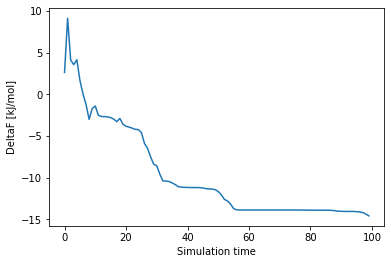

In [48]:
# calculate free-energy difference
DeltaF=[]; kbt=2.494339
# cycle on free-energy profiles
for i in range(0,100):   
 # import fes file into pandas dataset
 data=plumed.read_as_pandas("phospho/fes_"+str(i)+".dat")
 # find minimum value of fes
 minf = min(data["file.free"])
 # plot fes
 F0=0.0; F1=0.0
 for j in range(0, len(data["psi"])):
     d1 = data["d1"][j]
     # calculate probability
     p = math.exp((-data["file.free"][j]+minf)/kbt)
     # integrate in the two basins
     if(1.66<=d1<=3 ):F0 += p
     if(1.5<=d1<=1.65): F1 += p
 # calculate free energy difference and add to list
 DeltaF.append(-kbt*math.log(F0/F1))         
# plot
plt.plot(DeltaF) 
# labels
plt.xlabel("Simulation time")
plt.ylabel("DeltaF [kJ/mol]")


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: cannot load PLUMED instance, conversions will not be available
  # This is added back by InteractiveShellApp.init_path()


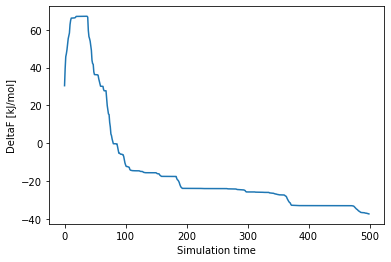

In [10]:
import plumed
import math
import matplotlib.pyplot as plt

DeltaF = []
kbt = 2.494339

# cycle on free-energy profiles
for i in range(0, 500):
    # import fes file into pandas dataset
    data = plumed.read_as_pandas("phospho/fes_" + str(i) + ".dat")
    # find minimum value of fes
    minf = min(data["file.free"])
    # plot fes
    F0 = 0.0
    F1 = 0.0
    for j in range(0, len(data["psi"])):
        psi = data["psi"][j]
        d1 = data["d1"][j]  
        # calculate probability
        p = math.exp((-data["file.free"][j] + minf) / kbt)
        # integrate in the two basins for psi and d1
        if (2 <= psi <= 3) and (2.0 <= d1 <= 2.2):
            F0 += p
        if (-1 <= psi <= 0) and (1.55 <= d1 <= 1.65):
            F1 += p

    # calculate free energy difference and add to list
    DeltaF.append(-kbt * math.log(F0 / F1))

# plot
plt.plot(DeltaF)
# labels
plt.xlabel("Simulation time")
plt.ylabel("DeltaF [kJ/mol]")
plt.savefig("new_DeltaF_psi_d1_together.pdf", format='pdf')


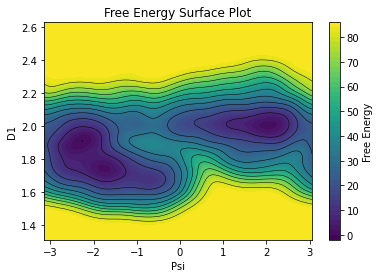

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load data from "fes_50.dat"
data = np.loadtxt("phospho/fes_100.dat")

# Extract columns for X, Y, and Z axes
psi = data[:, 0]
d1 =  data[:, 1]
free_energy = data[:, 2]

# Create a grid for plotting
grid_psi, grid_d1 = np.meshgrid(np.linspace(min(psi), max(psi), 100), np.linspace(min(d1), max(d1), 100))

# Interpolate the free energy values on the grid
grid_free_energy = griddata((psi, d1), free_energy, (grid_psi, grid_d1), method='cubic')

# Create a 1D free energy surface plot with color contours
plt.figure()
contour = plt.contourf(grid_psi, grid_d1, grid_free_energy, cmap='viridis', levels=50)
plt.colorbar(contour, label='Free Energy')

# Add more contour lines with different colors and line styles
contour_lines = plt.contour(grid_psi, grid_d1, grid_free_energy, colors='k', levels=10, linewidths=0.5)

# Add labels
plt.xlabel('Psi')
plt.ylabel('D1')
plt.title('Free Energy Surface Plot')

# Show the plot
plt.savefig("new_surface_fe_20ns.pdf", format='pdf')
plt.show()


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


Text(0, 0.5, 'Height [kJ/mol]')

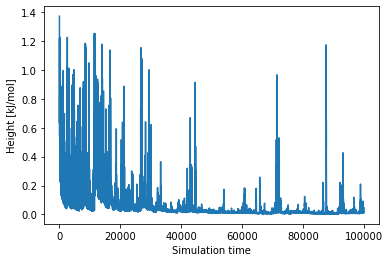

In [4]:
# visualize HILLS adding
data=plumed.read_as_pandas("phospho/HILLS")
plt.plot(data["time"][::10],data["height"][::10])
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("Height [kJ/mol]")

In [2]:
%%bash

cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE= up/v+center100nsup.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C(oncekires)-N(isimizinoldugures)-CA(isimizin oldugu res)-C(isimi..)
# you should use MOLINFO shortcuts
c1: CENTER ATOMS=3429,3452,3473,3493,3513,3533,3553,3569 #COM of P2(I207-L214) residues only Ca
# Compute the backbone dihedral angle psi, defined by atoms N(isolres)-CA(isolres)-C(isolres)-N(sonrakires)
# here also you should to use MOLINFO shortcuts
c2: CENTER ATOMS=4188 #Ca of Y250
c3: CENTER ATOMS=4186-4538 #COM Of Y250-K268
d1: ANGLE ATOMS=c1,c2,c3
# Print the two collective variables on COLVAR file every step
PRINT ARG=d1 FILE=compare-std-phospho3micro-angle STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/3micro/4/v+center.xtc 


DRIVER: Found molfile format trajectory xtc with name /media/user1/3f01b061-6b30-485c-8565-c41ef5a79485/8tb/trek2/trek2brohawn-alignment/new-trek2brohawn-mutatetrek1/trek2up/s331phosp-trek2up/compel/2e/3micro/4/v+center.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Aug 25 2023 at 13:52:28
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 245250
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label c1
PLUMED:   serial associated to this virtual atom is 245251
PLUMED:   of atoms:
PLUMED:  3429 3452 3473 3493 3513 3533 3553 3569
PLUMED:  

/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


Std dist run_A: 0.03730832648706689
Std dist run_B: 0.05062586136662255


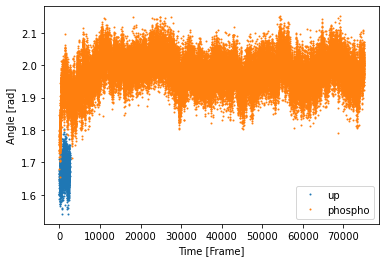

In [3]:
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas("up-angle")
dataB=plumed.read_as_pandas("compare-std-phospho3micro-angle")
# plot phi vs psi
plt.plot(dataA["time"],dataA["d1"],'o',ms=1, label="up")
plt.plot(dataB["time"],dataB["d1"],'o',ms=1, label="phospho")
# x-y axis labels
plt.xlabel("Time [Frame]")
plt.ylabel("Angle [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std dist run_A:",np.std(dataA["d1"]))
print("Std dist run_B:",np.std(dataB["d1"]))

#plt.savefig("cterm_angle_uprep4_phospholast100rep43micro.pdf", format='pdf')

/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


Text(0, 0.5, 'θ-M4helix [rad]')

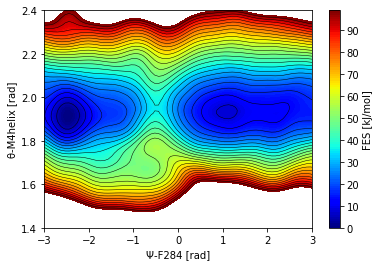

In [5]:
# plot final fes
data=plumed.read_as_pandas("phospho/fes_500.dat")
# get data for countour plot
rmsd_A = np.array(data["psi"]).reshape(95,72)
rmsd_B = np.array(data["d1"]).reshape(95,72)
fes    = np.array(data["file.free"]).reshape(95,72)
#plot
from matplotlib import ticker, cm
plt.contour(rmsd_A, rmsd_B, fes, levels=range(0,100,4), linewidths=0.5, colors='k')
cntr = plt.contourf(rmsd_A, rmsd_B, fes, levels=range(0,100), cmap=cm.jet)
plt.colorbar(cntr, label="FES [kJ/mol]")
plt.xlim(-3,3)
plt.ylim(1.4,2.4)
plt.xlabel("Ψ-F284 [rad]")
plt.ylabel("θ-M4helix [rad]")

Std dist run_A: 0.03730832648706689
Std dist run_B: 0.05787092063827728


/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  
/home/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


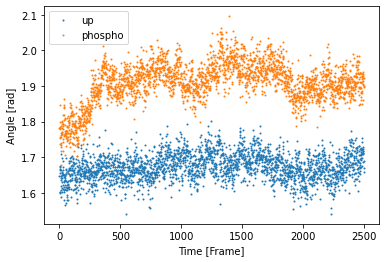

In [3]:
# import PLUMED COLVAR files into pandas datasets
dataA=plumed.read_as_pandas("up-angle")
dataB=plumed.read_as_pandas("silbeni")
# plot phi vs psi
plt.plot(dataA["time"],dataA["d1"],'o',ms=1, label="up")
plt.plot(dataB["time"],dataB["d1"],'o',ms=1, label="phospho")
# x-y axis labels
plt.xlabel("Time [Frame]")
plt.ylabel("Angle [rad]")
plt.legend()
# calculate Gaussian sigma
print("Std dist run_A:",np.std(dataA["d1"]))
print("Std dist run_B:",np.std(dataB["d1"]))

#plt.savefig("cterm_angle_uprep4_phospholast100rep43micro.pdf", format='pdf')